<a href="https://colab.research.google.com/github/manaswipatil11/VegetableMandiPrice/blob/main/mandi_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

plt.rcParams['figure.figsize']=12,12

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
dataset1=pd.read_excel('/content/mandi data apple price september.xlsx')
dataset2=pd.read_excel('/content/mandi data onion price prediction.xlsx')

In [ ]:
dataset1.drop('Arrival Date', axis=1, inplace=True)
dataset2.drop('Arrival Date', axis=1, inplace=True)

In [ ]:
dataset1

,Arrivals (Tonnes),Maximum Price(Rs./Quintal),Minimum Price(Rs./Quintal),Modal Price(Rs./Quintal)
0,2535.4,1875,7500,4854
1,3176.3,1875,7188,4854
2,3098.6,1875,7188,4854
3,2770.9,1875,7188,4854
4,4339.1,1875,7500,4958
...,...,...,...,...
91,3897.7,938,5313,2917
92,3394.6,1250,5625,3229
93,3433.4,1250,5625,3229
94,3642.7,1250,5625,3229


In [ ]:
dataset2

,Arrivals (Tonnes),Maximum Price(Rs./Quintal),Minimum Price(Rs./Quintal),Modal Price(Rs./Quintal)
0,984.1,350,1100,686
1,914.5,350,1200,707
2,878.4,350,1200,707
3,383.7,350,1125,704
4,1182.4,350,1125,704
...,...,...,...,...
94,973.0,2000,4250,3525
95,1198.3,1750,4000,3263
96,698.2,1700,4250,3263
97,609.6,1700,4250,3307


In [ ]:
dataset1.describe()

,Arrivals (Tonnes),Maximum Price(Rs./Quintal),Minimum Price(Rs./Quintal),Modal Price(Rs./Quintal)
count,96.000000,96.000000,96.000000,96.000000
mean,3602.483333,1538.489583,5422.250000,3475.833333
std,1218.628182,497.359512,1281.488616,885.484140
min,1387.900000,875.000000,3200.000000,2229.000000
25%,2657.050000,1125.000000,4393.750000,2917.000000
50%,3467.050000,1250.000000,5313.000000,3070.500000
75%,4374.375000,1875.000000,6250.000000,4019.250000
max,6783.100000,2800.000000,9000.000000,5433.000000


In [ ]:
dataset2.describe()

,Arrivals (Tonnes),Maximum Price(Rs./Quintal),Minimum Price(Rs./Quintal),Modal Price(Rs./Quintal)
count,99.000000,99.000000,99.000000,99.000000
mean,903.710101,737.626263,2026.767677,1417.909091
std,417.564580,540.436022,965.609227,849.071523
min,35.200000,175.000000,1000.000000,555.000000
25%,606.350000,375.000000,1375.000000,864.000000
50%,878.400000,500.000000,1500.000000,1143.000000
75%,1164.400000,1000.000000,2375.000000,1736.500000
max,2049.400000,2250.000000,4375.000000,3688.000000


In [ ]:
x=dataset1[['Arrivals (Tonnes)','Minimum Price(Rs./Quintal)','Maximum Price(Rs./Quintal)']].values
y=dataset1['Modal Price(Rs./Quintal)'].values

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
regressor=LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[0.06681314 0.48694111 0.73354014]


In [ ]:
print(regressor.intercept_)

-538.0964057735041


In [ ]:
predicted=regressor.predict(x_test)

>  **Here we have printed values for day 0 to day 30 using our prediction model. Each value given below represents the price at the day corresponding to index number.**

In [ ]:
print(predicted)

[2620.61283919 3031.4543667  4544.4512347  3897.96154076 2639.12181223
 3011.51064441 4284.94622639 3684.74624677 4060.60086402 2859.57454554
 5530.53680892 2976.07963626 2675.26444968 4813.37335019 5092.39604458
 2763.5938269  3805.17693164 2032.79597917 3041.50742316 5086.89064184
 2717.99569532 4337.66635375 4522.55656871 3007.82924039 2822.97250091
 2632.82230442 4779.77302208 3844.27068778 2985.40006929]


In [ ]:
dframe= pd.DataFrame({'Actual': y_test.flatten(),'Predicted':predicted.flatten()})

In [ ]:
dframe.head(25)

,Actual,Predicted
0,2484,2620.612839
1,2917,3031.454367
2,4854,4544.451235
3,3680,3897.961541
4,2667,2639.121812
5,2917,3011.510644
6,4688,4284.946226
7,3438,3684.746247
8,3790,4060.600864
9,2700,2859.574546


In [ ]:
import math

In [ ]:
print('mean absolute error', metrics.mean_absolute_error(y_test,predicted))
print('mean squared error', metrics.mean_squared_error(y_test,predicted))
print('root mean squared error', math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

mean absolute error 172.7297308716874
mean squared error 41164.34518341066
root mean squared error 13.142668331495221


In [ ]:
graph=dframe.head(30)

> **We can see the price compare to actual and predicted values in given bar graph. this graph is covering all the predicted price defferences for upcoming days.**

<Axes: >

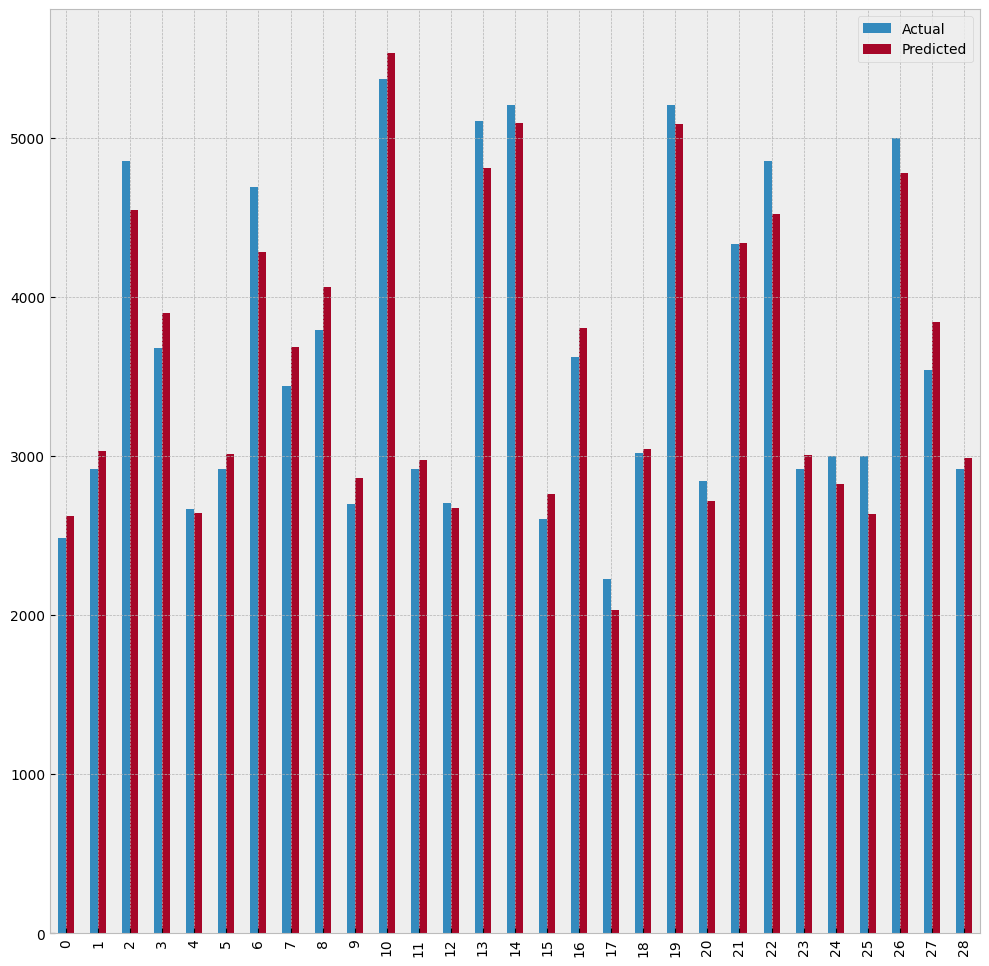

In [ ]:
graph.plot(kind='bar')

In [ ]:
x=dataset2[['Arrivals (Tonnes)','Minimum Price(Rs./Quintal)','Maximum Price(Rs./Quintal)']].values
y=dataset2['Modal Price(Rs./Quintal)'].values

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
regressor=LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)

[0.02436447 0.57552357 0.52326489]


In [ ]:
print(regressor.intercept_)

-162.8473745588633


In [ ]:
predicted=regressor.predict(x_test)

:FOR Onion
Here we have printed values for day 0 to day 30 using our prediction model. Each value given below represents the price at the day corresponding to index number.

In [ ]:
print(predicted)

[1520.29922462 2387.19495866  732.32537725  924.31355823 1800.08408445
 3540.05497212  638.42074671  990.36732845  932.29779481 3353.36423282
  932.57798621 3493.87507872 1961.49765009  541.69121129  697.13803643
 1748.11032026  519.47778585 1748.54157136 1643.03759493  610.04083861
 1187.38660782  929.02077369  677.10800624  837.0697883  1270.53448969
 1338.1210058   692.82065247 2929.54099347 2253.51790486 1966.3266879 ]


In [ ]:
dframe= pd.DataFrame({'Actual': y_test.flatten(),'Predicted':predicted.flatten()})

In [ ]:
dframe.head(25)

,Actual,Predicted
0,1615,1520.299225
1,2292,2387.194959
2,707,732.325377
3,1079,924.313558
4,1813,1800.084084
5,3688,3540.054972
6,606,638.420747
7,939,990.367328
8,1079,932.297795
9,3525,3353.364233


In [ ]:
print('mean absolute error', metrics.mean_absolute_error(y_test,predicted))
print('mean squared error', metrics.mean_squared_error(y_test,predicted))
print('root mean squared error', math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

mean absolute error 86.01471535093442
mean squared error 11710.012201572836
root mean squared error 9.274411860109213


In [ ]:
graph=dframe.head(30)

FOR ONION:
We can see the price compare to actual and predicted values in given bar graph. this graph is covering all the predicted price defferences for upcoming days.

<Axes: >

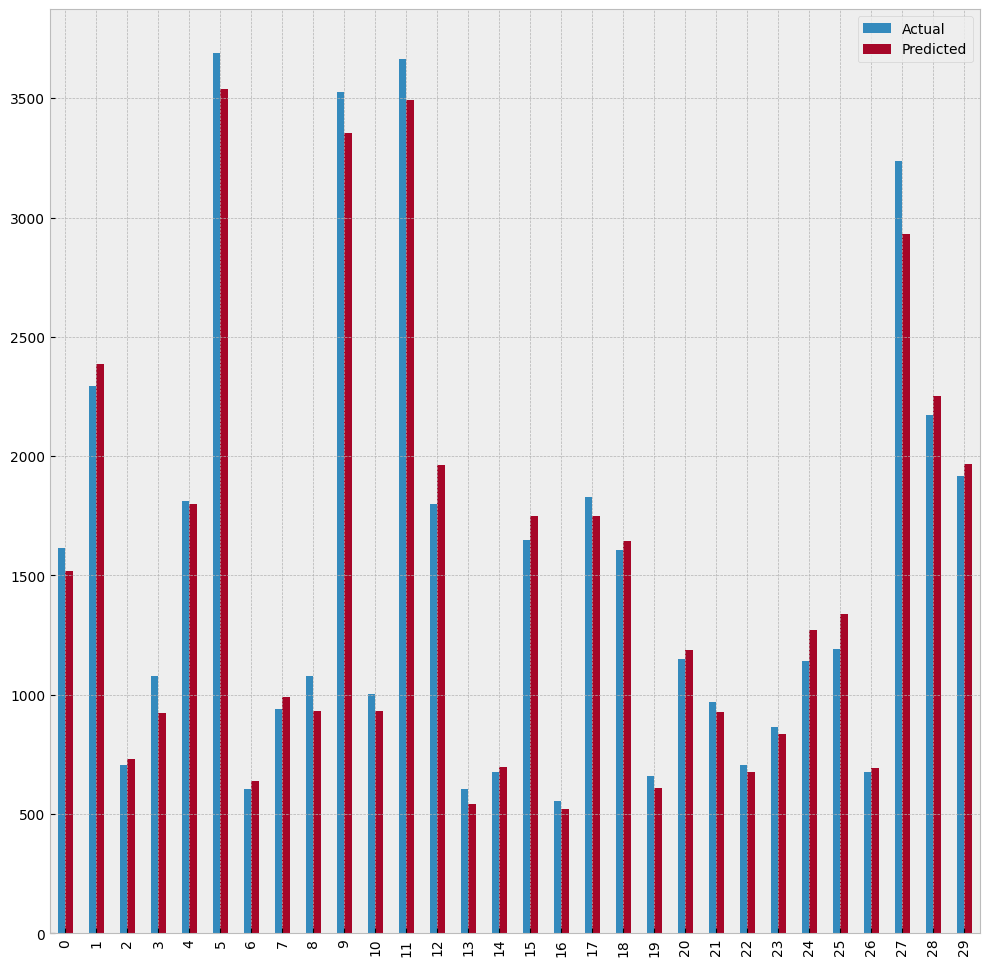

In [ ]:
graph.plot(kind='bar')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
df=pd.read_excel('/content/mandi data apple price september.xlsx')
df.head(6)

,Arrival Date,Arrivals (Tonnes),Maximum Price(Rs./Quintal),Minimum Price(Rs./Quintal),Modal Price(Rs./Quintal)
0,2016-01-09 00:00:00,2535.4,1875,7500,4854
1,2016-02-09 00:00:00,3176.3,1875,7188,4854
2,2016-03-09 00:00:00,3098.6,1875,7188,4854
3,2016-05-09 00:00:00,2770.9,1875,7188,4854
4,2016-06-09 00:00:00,4339.1,1875,7500,4958
5,2016-07-09 00:00:00,4675.7,1875,8125,5208


In [ ]:
df2=pd.read_excel('/content/mandi data onion price prediction.xlsx')
df2.head(6)

,Arrival Date,Arrivals (Tonnes),Maximum Price(Rs./Quintal),Minimum Price(Rs./Quintal),Modal Price(Rs./Quintal)
0,2016-01-09 00:00:00,984.1,350,1100,686
1,2016-02-09 00:00:00,914.5,350,1200,707
2,2016-03-09 00:00:00,878.4,350,1200,707
3,2016-05-09 00:00:00,383.7,350,1125,704
4,2016-06-09 00:00:00,1182.4,350,1125,704
5,2016-07-09 00:00:00,840.6,350,1125,675


In [ ]:
df.shape

(96, 5)

In [ ]:
df2.shape

(99, 5)

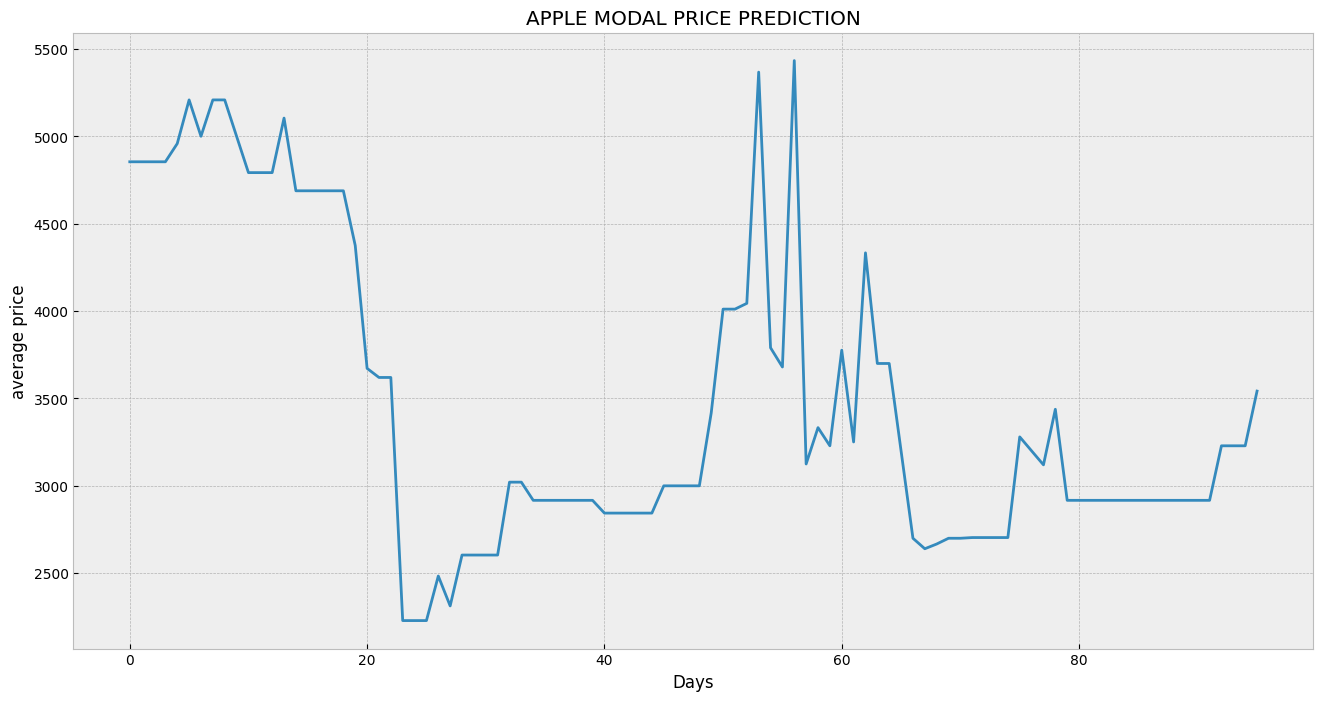

In [ ]:
plt.figure(figsize=(16,8))
plt.title('APPLE MODAL PRICE PREDICTION')
plt.xlabel('Days')
plt.ylabel('average price')
plt.plot(df['Modal Price(Rs./Quintal)'])
plt.show()

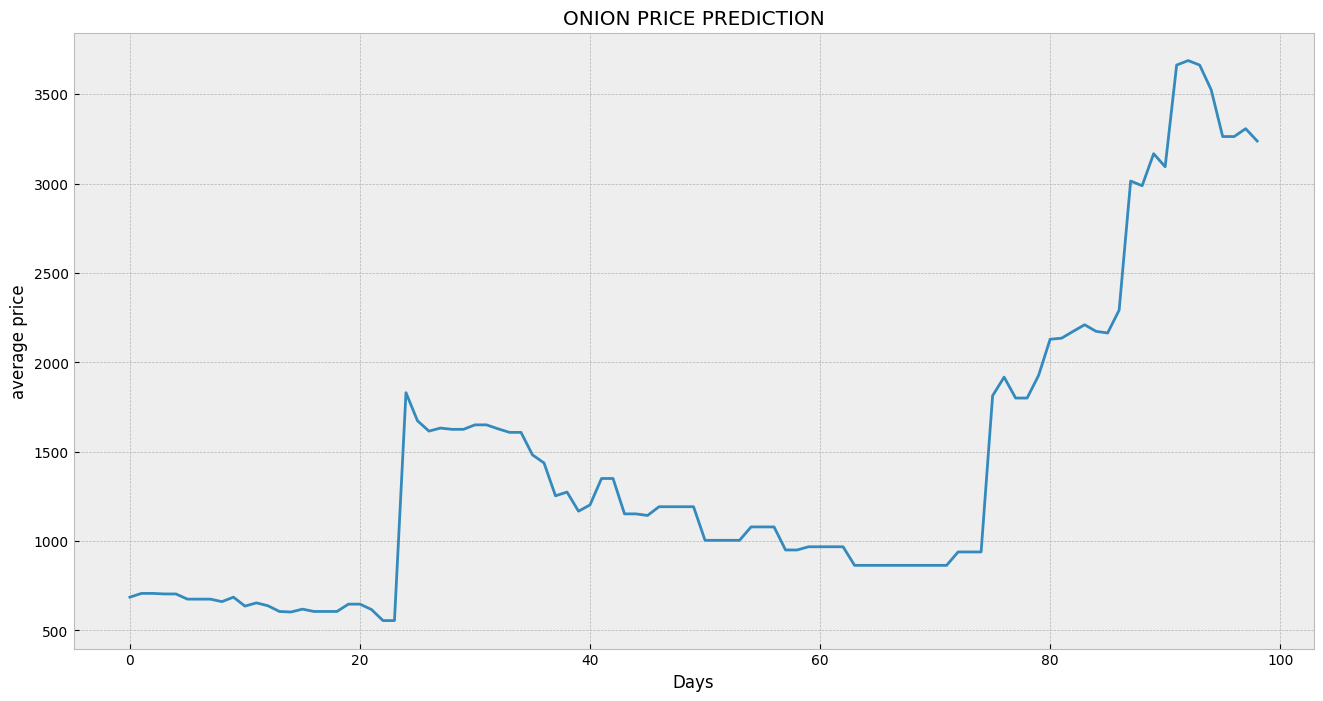

In [ ]:
plt.figure(figsize=(16,8))
plt.title('ONION PRICE PREDICTION')
plt.xlabel('Days')
plt.ylabel('average price')
plt.plot(df2['Modal Price(Rs./Quintal)'])
plt.show()

In [ ]:
df=df[['Modal Price(Rs./Quintal)']]
df.head(4)

,Modal Price(Rs./Quintal)
0,4854
1,4854
2,4854
3,4854


In [ ]:
df2=df2[['Modal Price(Rs./Quintal)']]
df2.head(4)

,Modal Price(Rs./Quintal)
0,686
1,707
2,707
3,704


In [ ]:
future_days=25
df['Prediction']=df[['Modal Price(Rs./Quintal)']].shift(-future_days)
df.head(4)

,Modal Price(Rs./Quintal),Prediction
0,4854,2229.0
1,4854,2484.0
2,4854,2313.0
3,4854,2604.0


In [ ]:
future_days=25
df2['Prediction']=df2[['Modal Price(Rs./Quintal)']].shift(-future_days)
df2.head(4)

,Modal Price(Rs./Quintal),Prediction
0,686,1673.0
1,707,1615.0
2,707,1632.0
3,704,1625.0


In [ ]:
X=np.array(df.drop(['Prediction'],1))[ : -future_days]
print(X)

[[4854]
 [4854]
 [4854]
 [4854]
 [4958]
 [5208]
 [5000]
 [5208]
 [5208]
 [5000]
 [4792]
 [4792]
 [4792]
 [5104]
 [4688]
 [4688]
 [4688]
 [4688]
 [4688]
 [4375]
 [3672]
 [3620]
 [3620]
 [2229]
 [2229]
 [2229]
 [2484]
 [2313]
 [2604]
 [2604]
 [2604]
 [2604]
 [3021]
 [3021]
 [2917]
 [2917]
 [2917]
 [2917]
 [2917]
 [2917]
 [2844]
 [2844]
 [2844]
 [2844]
 [2844]
 [3000]
 [3000]
 [3000]
 [3000]
 [3417]
 [4011]
 [4011]
 [4044]
 [5367]
 [3790]
 [3680]
 [5433]
 [3125]
 [3333]
 [3229]
 [3776]
 [3251]
 [4333]
 [3700]
 [3700]
 [3200]
 [2700]
 [2640]
 [2667]
 [2700]
 [2700]]


In [ ]:
X2=np.array(df2.drop(['Prediction'],1))[ : -future_days]
print(X2)

[[ 686]
 [ 707]
 [ 707]
 [ 704]
 [ 704]
 [ 675]
 [ 675]
 [ 675]
 [ 661]
 [ 686]
 [ 636]
 [ 654]
 [ 638]
 [ 606]
 [ 603]
 [ 619]
 [ 606]
 [ 606]
 [ 606]
 [ 647]
 [ 647]
 [ 617]
 [ 555]
 [ 555]
 [1830]
 [1673]
 [1615]
 [1632]
 [1625]
 [1625]
 [1650]
 [1650]
 [1628]
 [1608]
 [1608]
 [1482]
 [1437]
 [1253]
 [1274]
 [1167]
 [1202]
 [1350]
 [1350]
 [1152]
 [1152]
 [1143]
 [1192]
 [1192]
 [1192]
 [1192]
 [1004]
 [1004]
 [1004]
 [1004]
 [1079]
 [1079]
 [1079]
 [ 950]
 [ 950]
 [ 968]
 [ 968]
 [ 968]
 [ 968]
 [ 864]
 [ 864]
 [ 864]
 [ 864]
 [ 864]
 [ 864]
 [ 864]
 [ 864]
 [ 864]
 [ 939]
 [ 939]]


> **HERE WE HAVE ANOTHER SET TO COMPARE OUR PREDICTED PRICE FOR APPLE PRICE AND ONION PRICE RESPECTIVELY. YOU CAN SEE WHAT IS THE INCREASE OR DECREASE IN OUR PRICE CHART.**

In [ ]:
y=np.array(df['Prediction'])[ : -future_days]
print(y)

[2229. 2484. 2313. 2604. 2604. 2604. 2604. 3021. 3021. 2917. 2917. 2917.
 2917. 2917. 2917. 2844. 2844. 2844. 2844. 2844. 3000. 3000. 3000. 3000.
 3417. 4011. 4011. 4044. 5367. 3790. 3680. 5433. 3125. 3333. 3229. 3776.
 3251. 4333. 3700. 3700. 3200. 2700. 2640. 2667. 2700. 2700. 2704. 2704.
 2704. 2704. 3280. 3200. 3120. 3438. 2917. 2917. 2917. 2917. 2917. 2917.
 2917. 2917. 2917. 2917. 2917. 2917. 2917. 3229. 3229. 3229. 3542.]


In [ ]:
y2=np.array(df2['Prediction'])[ : -future_days]
print(y2)

[1673. 1615. 1632. 1625. 1625. 1650. 1650. 1628. 1608. 1608. 1482. 1437.
 1253. 1274. 1167. 1202. 1350. 1350. 1152. 1152. 1143. 1192. 1192. 1192.
 1192. 1004. 1004. 1004. 1004. 1079. 1079. 1079.  950.  950.  968.  968.
  968.  968.  864.  864.  864.  864.  864.  864.  864.  864.  864.  939.
  939.  939. 1813. 1917. 1800. 1800. 1927. 2129. 2135. 2173. 2210. 2173.
 2164. 2292. 3014. 2988. 3167. 3094. 3663. 3688. 3663. 3525. 3263. 3263.
 3307. 3238.]


In [ ]:
x_train,x_test, y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
x2_train,x2_test, y2_train,y2_test=train_test_split(X2,y2,test_size=0.25)

In [ ]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [ ]:
tree=DecisionTreeRegressor().fit(x2_train,y2_train)
lr=LinearRegression().fit(x2_train,y2_train)

GIVEN FOLLOWING TWO CELLS ARE DISPLAYING US OUTPUT FOR NEXT 30 DAYS OF SEPTEMBER FOR APPLE AND ONION RESPECTIVELY.

In [ ]:
x_future=df.drop(['Prediction'],1)[ : -future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[3000],
       [3000],
       [3000],
       [3417],
       [4011],
       [4011],
       [4044],
       [5367],
       [3790],
       [3680],
       [5433],
       [3125],
       [3333],
       [3229],
       [3776],
       [3251],
       [4333],
       [3700],
       [3700],
       [3200],
       [2700],
       [2640],
       [2667],
       [2700],
       [2700]])

In [ ]:
x2_future=df2.drop(['Prediction'],1)[ : -future_days]
x2_future=x2_future.tail(future_days)
x2_future=np.array(x2_future)
x2_future

array([[1192],
       [1004],
       [1004],
       [1004],
       [1004],
       [1079],
       [1079],
       [1079],
       [ 950],
       [ 950],
       [ 968],
       [ 968],
       [ 968],
       [ 968],
       [ 864],
       [ 864],
       [ 864],
       [ 864],
       [ 864],
       [ 864],
       [ 864],
       [ 864],
       [ 864],
       [ 939],
       [ 939]])

In [ ]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction=lr.predict(x_future)
print(lr_prediction)

[1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192.
 1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192. 1192.
 1192.]

[  361.43172534   361.43172534   361.43172534    92.65788622
  -290.19981268  -290.19981268  -311.46968484 -1164.19819601
  -147.75612336   -76.85654949 -1206.73794033   280.86402776
   146.79937899   213.83170338  -138.73254123   199.6517886
  -497.74220164   -89.7473811    -89.7473811    232.52340921
   554.79419953   593.46669437   576.06407169   554.79419953
   554.79419953]


In [ ]:
tree_prediction=tree.predict(x2_future)
print(tree_prediction)
print()

lr_prediction=lr.predict(x2_future)
print(lr_prediction)

[ 901.5  1839.   1839.   1839.   1839.   2028.   2028.   2028.   2191.5
 2191.5  2410.75 2410.75 2410.75 2410.75 3545.25 3545.25 3545.25 3545.25
 3545.25 3545.25 3545.25 3545.25 3545.25 3272.5  3272.5 ]

[1526.76290312 1647.93672028 1647.93672028 1647.93672028 1647.93672028
 1599.59610173 1599.59610173 1599.59610173 1682.74196563 1682.74196563
 1671.14021718 1671.14021718 1671.14021718 1671.14021718 1738.17254156
 1738.17254156 1738.17254156 1738.17254156 1738.17254156 1738.17254156
 1738.17254156 1738.17254156 1738.17254156 1689.83192302 1689.83192302]


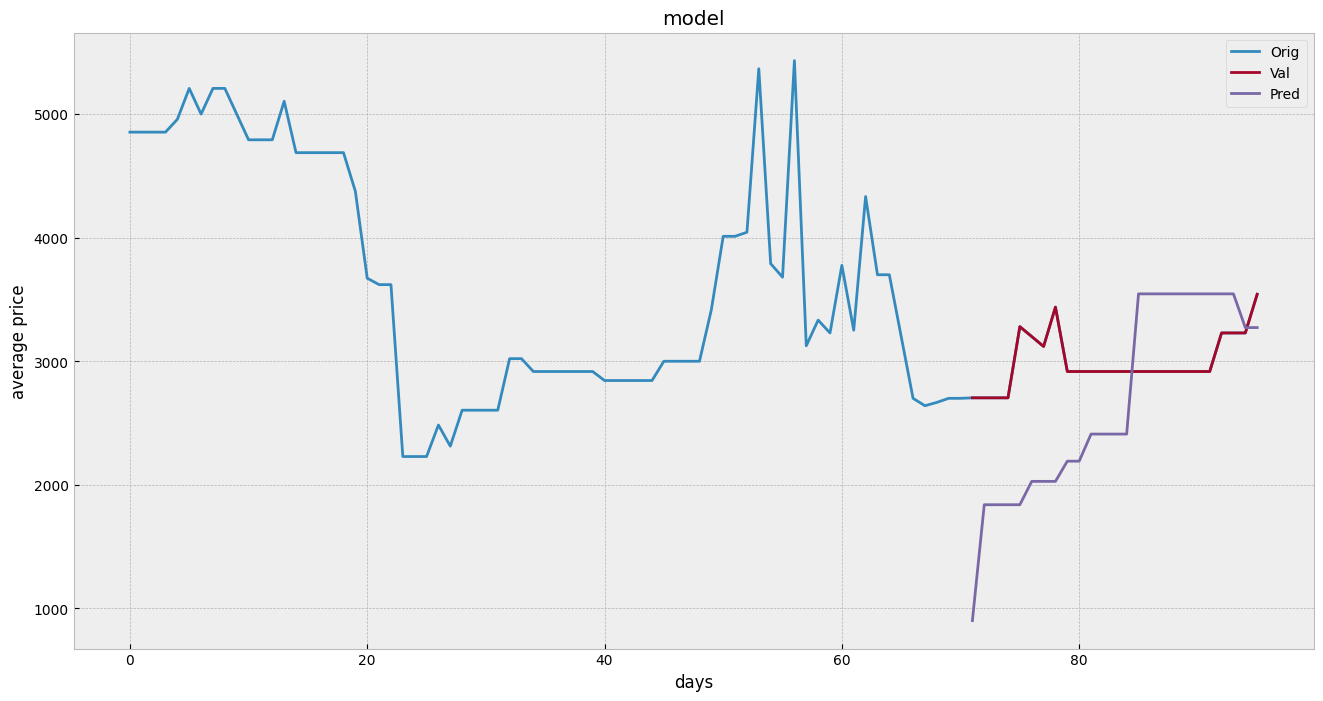

In [ ]:
predictions = tree_prediction
valid=df[X.shape[0]: ]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('average price')
plt.plot(df['Modal Price(Rs./Quintal)'])
plt.plot(valid[['Modal Price(Rs./Quintal)','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

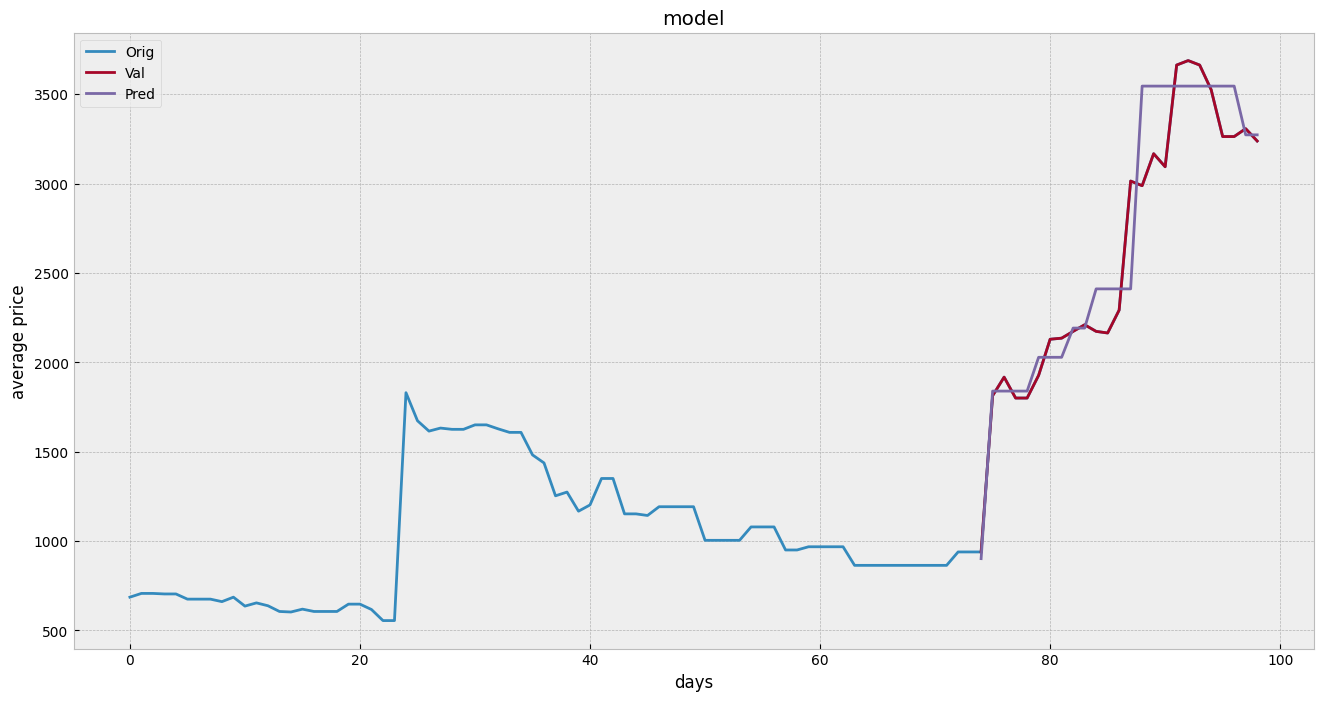

In [ ]:
predictions = tree_prediction
valid=df2[X2.shape[0]: ]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('average price')
plt.plot(df2['Modal Price(Rs./Quintal)'])
plt.plot(valid[['Modal Price(Rs./Quintal)','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

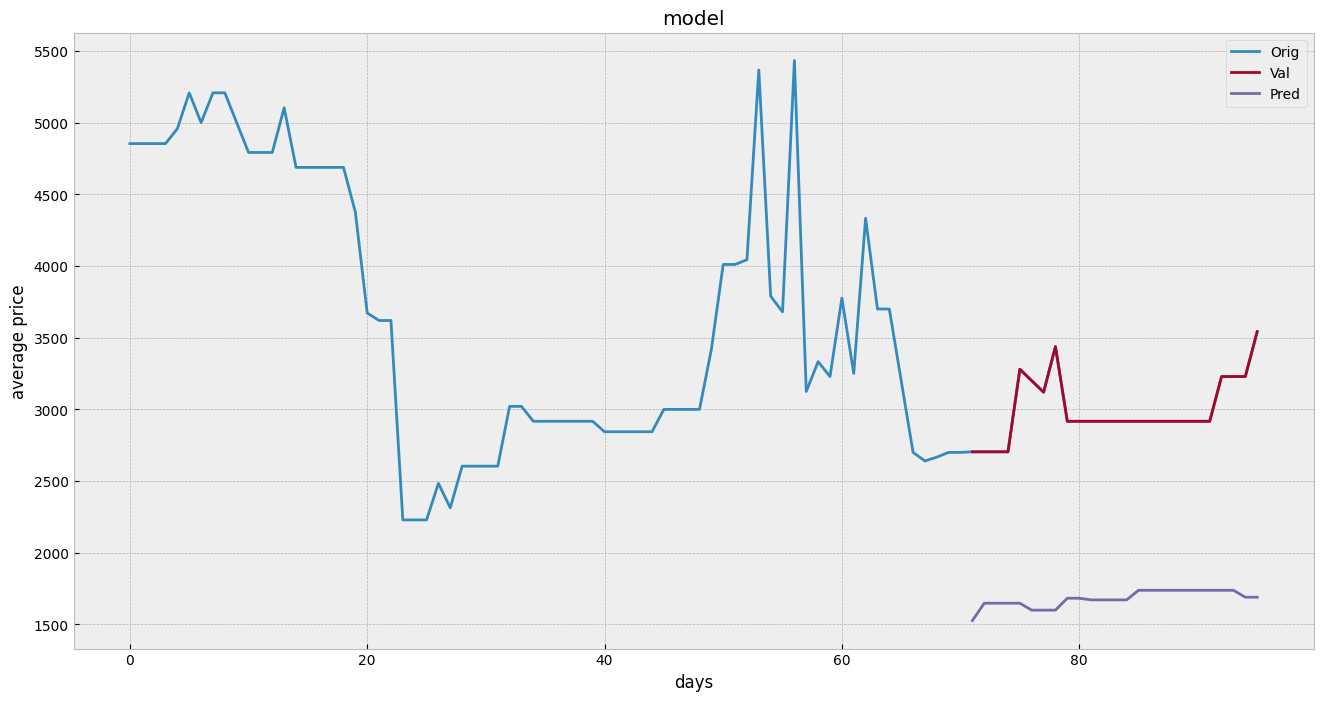

In [ ]:
predictions = lr_prediction
valid=df[X.shape[0]: ]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('average price')
plt.plot(df['Modal Price(Rs./Quintal)'])
plt.plot(valid[['Modal Price(Rs./Quintal)','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

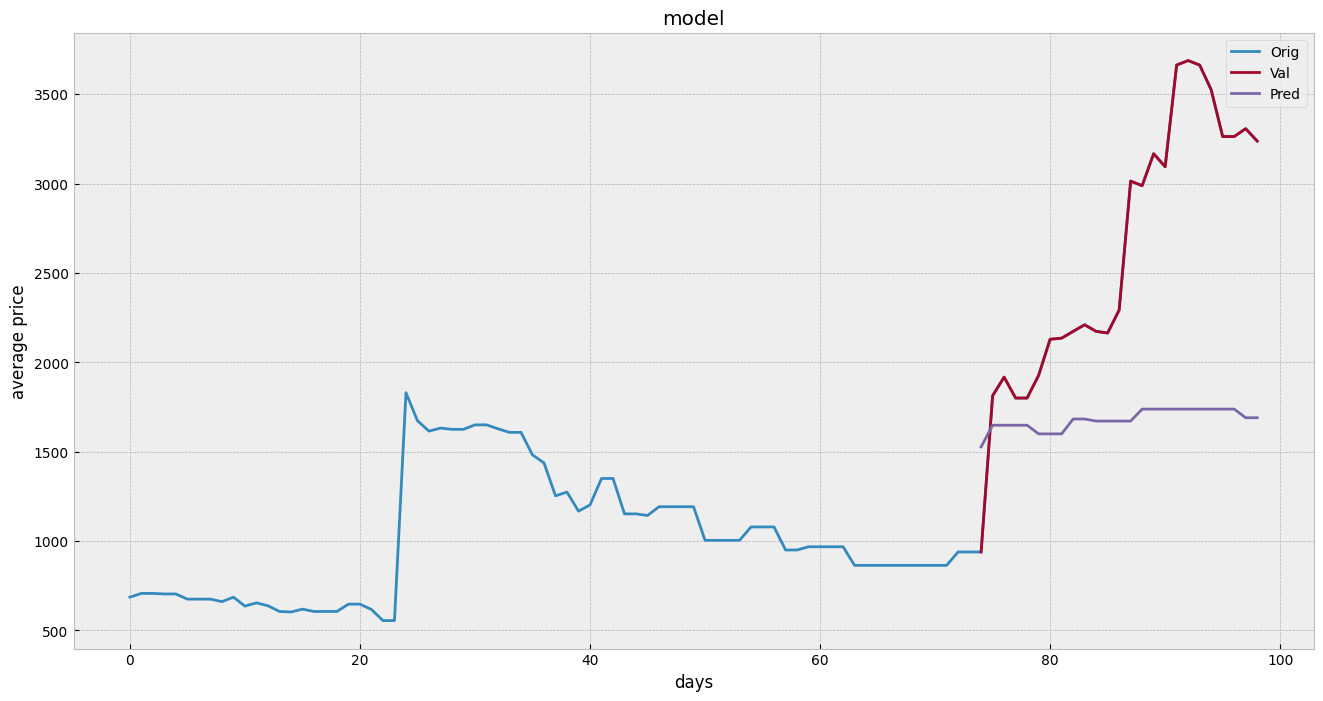

In [ ]:
predictions = lr_prediction
valid=df2[X2.shape[0]: ]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('days')
plt.ylabel('average price')
plt.plot(df2['Modal Price(Rs./Quintal)'])
plt.plot(valid[['Modal Price(Rs./Quintal)','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [ ]:
import json

# Create a list of dictionaries for JSON
data = []
for i, price in enumerate(predictions):
    data.append({
        'Day': i + 1,  # Day starts from 1
        'Price': price
    })

# Save the data to a JSON file
with open('forecast_data.json', 'w') as f:
    json.dump(data, f)